In [114]:
# import the libraries for data analysis
import pandas as pd   
import numpy as np       
import matplotlib.pyplot as plt                     
import seaborn as sns      
import scipy 
from sklearn.model_selection import train_test_split

In [19]:
# import csv file and read it
data = pd.read_csv('baby_activity_logs.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    5715 non-null   object
 1   time             5715 non-null   object
 2   clock_system     5715 non-null   object
 3   parent_activity  5715 non-null   object
 4   status           5715 non-null   object
 5   unit             3494 non-null   object
 6   month            5715 non-null   object
 7   day              5715 non-null   int64 
 8   year             5715 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 402.0+ KB


In [20]:
# how much NA are in the data
data_na = data.isnull().sum()
print(data_na)

baby_activity         0
time                  0
clock_system          0
parent_activity       0
status                0
unit               2221
month                 0
day                   0
year                  0
dtype: int64


In [21]:
# baby activity data
data['baby_activity'].value_counts()

baby_activity
Feeding        3140
Diaper         2255
Sleep           304
Milestone         7
Temperature       6
Activity          2
Joy               1
Name: count, dtype: int64

In [22]:
data['year'].unique()

array([2022, 2023, 2024])

In [23]:
data['baby_activity'].unique()

array(['Diaper', 'Feeding', 'Sleep', 'Temperature', 'Milestone',
       'Activity', 'Joy'], dtype=object)

In [24]:
milestone = data[data['baby_activity'] == 'Milestone']
milestone.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
316,Milestone,1:51,PM,Tries,first,solid,July,11,2022
3929,Milestone,9:49,PM,First,smile,NaN,March,22,2022
4706,Milestone,11:03,AM,Tries,table,food,November,16,2022
5338,Milestone,12:09,PM,Babbles,Started,talking,August,1,2022
5351,Milestone,12:10,PM,Laughs,out,loud,August,26,2022


In [25]:
not_feed = data[(data['baby_activity'] == 'Feeding') &
                (data['parent_activity'] != 'Formula') &
                (data['year'] == 2022)]
not_feed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 9 to 5714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    107 non-null    object
 1   time             107 non-null    object
 2   clock_system     107 non-null    object
 3   parent_activity  107 non-null    object
 4   status           107 non-null    object
 5   unit             107 non-null    object
 6   month            107 non-null    object
 7   day              107 non-null    int64 
 8   year             107 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 8.4+ KB


In [26]:
not_feed.head()
print(not_feed.shape)
print(not_feed['status'].unique())

(107, 9)
['blueberry' '10' 'Pear' '1.25' 'banana' 'carrot' '2' 'mango' 'pur?' '0.5'
 'squash' 'cinnamon' '1' 'pear,' 'corn' 'nut' 'kale' '2.5' '1.5' '4'
 'Syrup' 'and' 'sauce' 'Mango' '1.8' 'Nut' '0.25' '20']


In [27]:
not_feed['parent_activity'].unique()

array(['Banana', 'Nursing', 'Apple', 'Motrin', 'Blueberry', 'Cereal',
       'Expressed', 'Butternut', 'Oatmeal', 'Apple,', 'Strawberry,',
       'Sweet', 'Beach', 'Mango', 'Advil', 'Fruit', 'Cough', 'Beachnut',
       'Water', 'Carrots', 'Veggies'], dtype=object)

In [28]:
not_feed['parent_activity'].value_counts()

#motrin = not_feed[not_feed['baby_activity'] == 'Motrin']
#print(motrin)

parent_activity
Apple          52
Cereal          8
Expressed       6
Motrin          5
Butternut       5
Water           4
Advil           4
Apple,          4
Banana          2
Carrots         2
Nursing         2
Beach           2
Beachnut        2
Cough           2
Blueberry       1
Oatmeal         1
Strawberry,     1
Sweet           1
Mango           1
Fruit           1
Veggies         1
Name: count, dtype: int64

In [119]:
motrin = not_feed[(not_feed['parent_activity'] == 'Motrin') |
                  (not_feed['parent_activity'] == 'Advil')]
motrin.head(10)

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
87,Feeding,1:14,PM,Motrin,1.25,Ml,December,1,2022
1351,Feeding,4:18,AM,Motrin,1.25,Ml,December,1,2022
1585,Feeding,4:50,AM,Advil,1.25,ml,August,29,2022
2360,Feeding,6:43,AM,Motrin,1.25,Ml,December,2,2022
2628,Feeding,7:09,PM,Motrin,1.25,Ml,November,30,2022
3246,Feeding,8:26,PM,Motrin,1.25,Ml,December,1,2022
4187,Feeding,10:21,PM,Advil,1.25,ml,August,2,2022
5430,Feeding,12:21,PM,Advil,1.25,ml,August,2,2022
5657,Feeding,12:51,PM,Advil,1.25,ml,August,3,2022


In [121]:
matted = not_feed['parent_activity'].isin(['Motrin', 'Advil'])
print(matted)

9       False
37      False
42      False
87       True
103     False
        ...  
5617    False
5626    False
5657     True
5677    False
5714    False
Name: parent_activity, Length: 107, dtype: bool


In [124]:
mot = not_feed[not_feed['parent_activity'].isin(['Motrin', 'Advil'])]
mot.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
87,Feeding,1:14,PM,Motrin,1.25,Ml,December,1,2022
1351,Feeding,4:18,AM,Motrin,1.25,Ml,December,1,2022
1585,Feeding,4:50,AM,Advil,1.25,ml,August,29,2022
2360,Feeding,6:43,AM,Motrin,1.25,Ml,December,2,2022
2628,Feeding,7:09,PM,Motrin,1.25,Ml,November,30,2022


In [65]:
motrin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 87 to 5657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    9 non-null      object
 1   time             9 non-null      object
 2   clock_system     9 non-null      object
 3   parent_activity  9 non-null      object
 4   status           9 non-null      object
 5   unit             9 non-null      object
 6   month            9 non-null      object
 7   day              9 non-null      int64 
 8   year             9 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 720.0+ bytes


In [66]:
motrin['status'] = pd.to_numeric(motrin['status'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\2666555131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motrin['status'] = pd.to_numeric(motrin['status'])


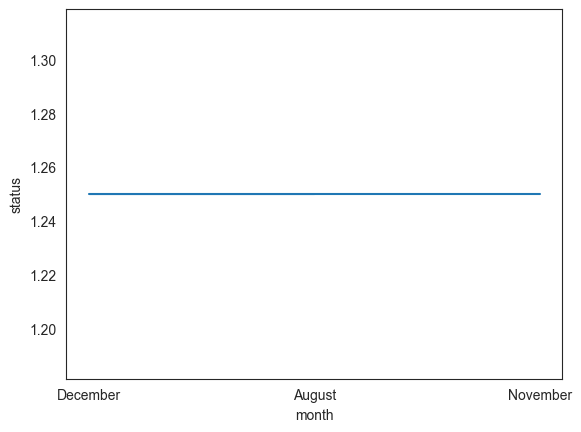

In [67]:
sns.lineplot(data=motrin, x='month', y='status'
             )

plt.show()

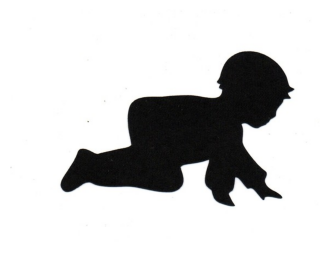

In [30]:
import cv2
from PIL import Image

img = cv2.imread('baby_img.jpg')
cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.figure(figsize=(4, 6))
plt.imshow(cv_img)
plt.axis("off")  # Hide axes
plt.show()

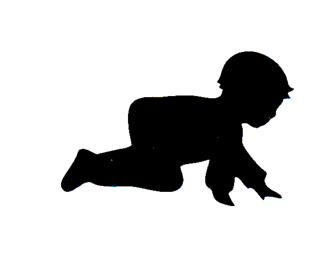

In [31]:
_, mask_cleaned = cv2.threshold(cv_img, 50, 255, cv2.THRESH_BINARY)
masked = np.array(Image.open('baby_img.jpg').convert('L'))
cv2.imwrite("cleaned_baby_shape.png", mask_cleaned)


# Display using Matplotlib
plt.figure(figsize=(4, 6))
plt.imshow(mask_cleaned)
plt.axis("off")  # Hide axes
plt.show()


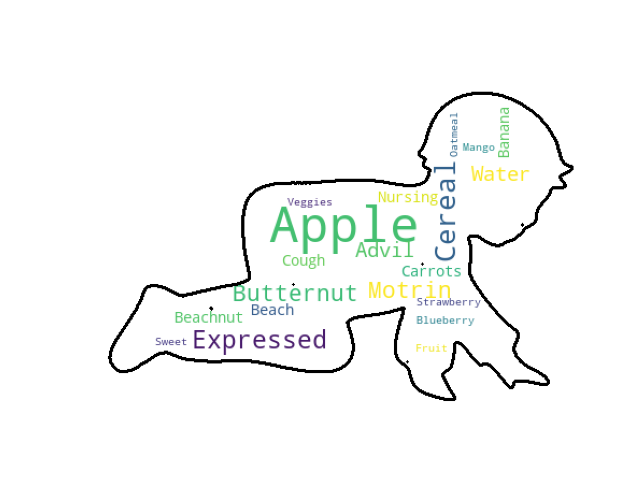

In [32]:
from wordcloud import WordCloud, STOPWORDS
from PIL import  Image
import cv2

text = " ".join(not_feed['parent_activity'].astype(str))
#mask = np.array(Image.open('baby_img.jpg'))
mask = np.array(Image.open('baby_img.jpg').convert('L'))
#mask = Image.open('baby_img.jpg')

# Create a word cloud with custom shape
wordcloud = WordCloud(
    background_color="white", 
    margin=1,
    mask=mask_cleaned, 
    contour_width=2, 
    contour_color="black",
    colormap="viridis",  # Adjust colors
    width=800,
    height=800
).generate(text)

# Display the word cloud
plt.figure(figsize=(8,6))
#plt.imshow(wordcloud, interpolation="bilinear")
plt.imshow(wordcloud)
plt.axis("off")  # Hide axes
plt.show()



#### Format and characterize the data

In [33]:
# Convert time column to datetime
data['time'] = pd.to_datetime(data['time'], format= '%H:%M').dt.time
data.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,01:00:00,AM,change,Wet,NaN,February,12,2022
1,Feeding,01:00:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,01:00:00,PM,Formula,0.5,oz.,March,20,2022
3,Diaper,01:00:00,PM,change,Wet,NaN,March,20,2022
4,Feeding,01:00:00,PM,Formula,2,oz.,March,23,2022


In [34]:
# convert month column to month
#data['month'] = pd.to_datetime(data['month'], format = '%m').dt.month
data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    5715 non-null   object
 1   time             5715 non-null   object
 2   clock_system     5715 non-null   object
 3   parent_activity  5715 non-null   object
 4   status           5715 non-null   object
 5   unit             3494 non-null   object
 6   month            5715 non-null   object
 7   day              5715 non-null   int64 
 8   year             5715 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 402.0+ KB


,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,01:00:00,AM,change,Wet,NaN,February,12,2022
1,Feeding,01:00:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,01:00:00,PM,Formula,0.5,oz.,March,20,2022
3,Diaper,01:00:00,PM,change,Wet,NaN,March,20,2022
4,Feeding,01:00:00,PM,Formula,2,oz.,March,23,2022


In [35]:
# find unique values in the baby_activity column
data['baby_activity'].unique()

array(['Diaper', 'Feeding', 'Sleep', 'Temperature', 'Milestone',
       'Activity', 'Joy'], dtype=object)

In [36]:
# select year from 2022
data_2022 = data[data['year'] == 2022]

In [37]:
# filter the data based on the measurable baby activities
# filter the diaper change data
diaper = data_2022[data_2022['baby_activity'] == 'Diaper']

# filter the feeding data
feed = data_2022[data_2022['baby_activity'] == 'Feeding']

# filter the sleep data
sleep = data_2022[data_2022['baby_activity'] == 'Sleep']

In [38]:
# print to view data for each activity
diaper.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,01:00:00,AM,change,Wet,NaN,February,12,2022
3,Diaper,01:00:00,PM,change,Wet,NaN,March,20,2022
6,Diaper,01:00:00,PM,change,Wet,NaN,April,19,2022
7,Diaper,01:00:00,PM,change,Wet,NaN,July,15,2022
10,Diaper,01:00:00,PM,change,Wet,NaN,November,30,2022


In [39]:
#feed.head()
feed = feed[feed['parent_activity'] == 'Formula']

feed.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
1,Feeding,01:00:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,01:00:00,PM,Formula,0.5,oz.,March,20,2022
4,Feeding,01:00:00,PM,Formula,2,oz.,March,23,2022
8,Feeding,01:00:00,PM,Formula,2.7,oz.,July,27,2022
12,Feeding,01:01:00,PM,Formula,1,oz.,March,1,2022


In [40]:
#sleep.head()
sleep['parent_activity'].unique()

sleep = sleep[sleep['parent_activity'] == 'Slept']
sleep.head()

# replace hrs with hr
sleep['unit'] = sleep['unit'].replace('hr', 'hrs')
sleep.head()



,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
5,Sleep,01:00:00,AM,Slept,13,hrs,April,2,2022
13,Sleep,01:01:00,AM,Slept,7,hrs,March,19,2022
49,Sleep,01:07:00,PM,Slept,1,hrs,February,27,2022
63,Sleep,01:09:00,PM,Slept,21,hrs,February,9,2022
92,Sleep,01:15:00,PM,Slept,7,hrs,July,8,2022


In [41]:
sleep.dtypes
sleep['status'] = pd.to_numeric(sleep['status'])

sleep.dtypes

baby_activity      object
time               object
clock_system       object
parent_activity    object
status              int64
unit               object
month              object
day                 int64
year                int64
dtype: object

In [42]:
# convert sleep hours from hours to minutes

def convert_hrs_to_minutes(hours, units, df):
    sleep_minutes = []
    
    for index, hour in hours.items():
        if units[index] == "hrs":
            sleep_minutes.append(hour * 60)
        else:
            sleep_minutes.append(hour)
                    
    df['sleep_minutes'] = sleep_minutes
    
convert_hrs_to_minutes(sleep['status'], sleep['unit'], sleep)

sleep.head()
# sleep = lambda: sleep[sleep[]]

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year,sleep_minutes
5,Sleep,01:00:00,AM,Slept,13,hrs,April,2,2022,780
13,Sleep,01:01:00,AM,Slept,7,hrs,March,19,2022,420
49,Sleep,01:07:00,PM,Slept,1,hrs,February,27,2022,60
63,Sleep,01:09:00,PM,Slept,21,hrs,February,9,2022,1260
92,Sleep,01:15:00,PM,Slept,7,hrs,July,8,2022,420


In [43]:
# def hour_converter(hours, units, dx):
#     converted_df = []
#     for index, hour in hours.items():
#         if units[index] == 'hrs':
#             converted_df.append(hour * 60)
#         else:
#             converted_df.append(hour)
            
#     dx['home'] = converted_df
            
# use lambda function
sleep['new_minutes'] = sleep.apply(lambda row: row['status'] * 60 if row['unit'] == "hrs" else row['status'], axis=1 )
#sleep['new_minutes'] = sleep.apply(lambda row: if row['unit'] == 'hrs' row['status'] * 60 else row['status'], axis = 1)


# use numpy instead of a function
sleep['minutes'] = np.where(sleep['unit'] == 'hrs', sleep['status']*60, sleep['status'])

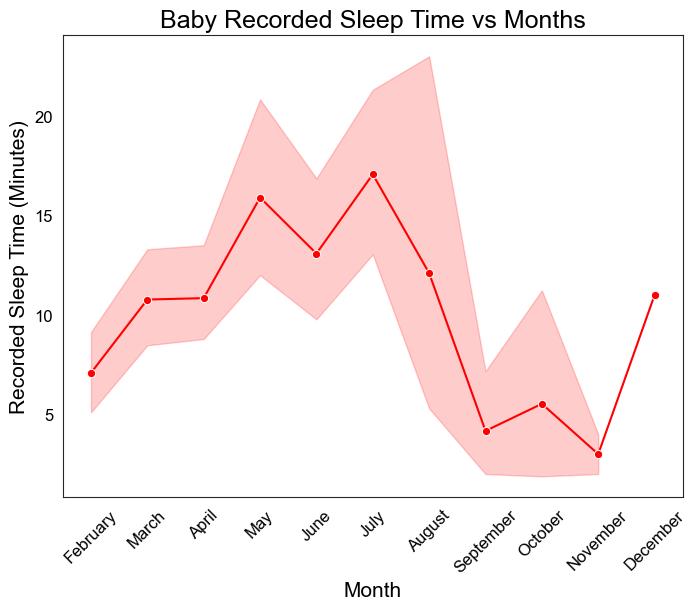

In [44]:
# plot sleep data using the minute calculation
months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


sleep['month'] = pd.Categorical(sleep['month'], categories=months, ordered=True )

sleep = sleep.sort_values('month')

plt.figure(figsize=(8,6))
sns.set_style(style= 'white')

sns.lineplot(data=sleep, x='month', y='status', color='red', marker = 'o')

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Recorded Sleep Time (Minutes)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Baby Recorded Sleep Time vs Months', color='black', fontsize=18)
           
plt.show()



In [45]:
sleep.head(5)

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year,sleep_minutes,new_minutes,minutes
5671,Sleep,12:53:00,PM,Slept,1,hrs,February,18,2022,60,60,60
2367,Sleep,06:45:00,PM,Slept,19,min,February,10,2022,19,19,19
2271,Sleep,06:34:00,PM,Slept,29,min,February,28,2022,29,29,29
2101,Sleep,06:10:00,AM,Slept,1,hrs,February,16,2022,60,60,60
2024,Sleep,06:00:00,PM,Slept,2,hrs,February,14,2022,120,120,120


In [46]:
# plot average sleep time across months
sleep_average= sleep.groupby('month')['sleep_minutes'].mean().reset_index()
sleep_average.head()

sleep_sum = sleep.groupby('month')['sleep_minutes'].sum().reset_index()
sleep_sum

C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\3343319689.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_average= sleep.groupby('month')['sleep_minutes'].mean().reset_index()
C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\3343319689.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_sum = sleep.groupby('month')['sleep_minutes'].sum().reset_index()


,month,sleep_minutes
0,February,15890
1,March,18963
2,April,20590
3,May,16289
4,June,16991
5,July,13672
6,August,3897
7,September,1500
8,October,2867
9,November,540


In [47]:
hrs_sleep_max = sleep.loc[sleep['unit']== 'hrs', 'status'].max()

# imperfect baby sleep logs
month_max_sleep = sleep[sleep['status'] == 24]


print(hrs_sleep_max)
month_max_sleep.head()
print(month_max_sleep.iloc[0,6])
#np.where(sleep['unit'] == 'hrs', max(sleep['status']))

24
March


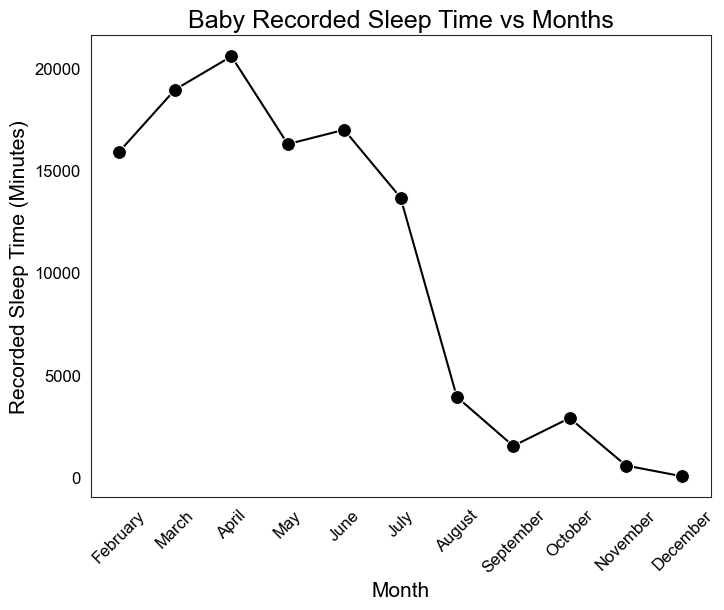

In [48]:
# plot sleep data using the minute calculation
months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


sleep_sum['month'] = pd.Categorical(sleep_sum['month'], categories=months, ordered=True )

sleep_sum = sleep_sum.sort_values('month')

plt.figure(figsize=(8,6))
sns.set_style(style= 'white')

sns.lineplot(data=sleep_sum, x='month', y='sleep_minutes', color='black', marker = 'o', markersize=10)

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Recorded Sleep Time (Minutes)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Baby Recorded Sleep Time vs Months', color='black', fontsize=18)
           
plt.show()

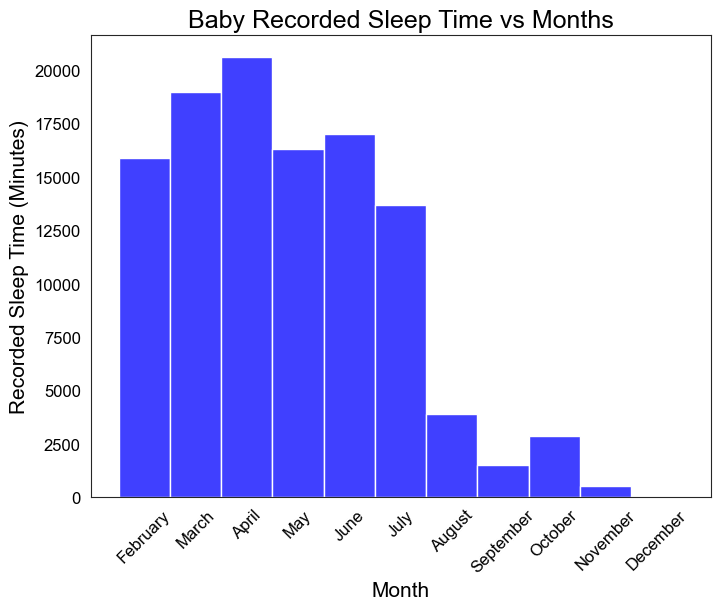

In [49]:
# plot histogram of sleep data
plt.figure(figsize=(8,6))
sns.set_style(style='white')

months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


sleep['month'] = pd.Categorical(sleep['month'], categories=months, ordered=True )

sleep = sleep.sort_values('month')

sns.histplot(data=sleep, x='month', weights='sleep_minutes', bins=20, discrete=True, kde=False, color="blue")

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Recorded Sleep Time (Minutes)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Baby Recorded Sleep Time vs Months', color='black', fontsize=18)
           
plt.show()

#### Baby Formula Data Analysis


In [51]:
feed.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
1,Feeding,01:00:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,01:00:00,PM,Formula,0.5,oz.,March,20,2022
4,Feeding,01:00:00,PM,Formula,2,oz.,March,23,2022
8,Feeding,01:00:00,PM,Formula,2.7,oz.,July,27,2022
12,Feeding,01:01:00,PM,Formula,1,oz.,March,1,2022


In [52]:
feed['parent_activity'].unique()

array(['Formula'], dtype=object)

In [53]:
feed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 1 to 5712
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    2643 non-null   object
 1   time             2643 non-null   object
 2   clock_system     2643 non-null   object
 3   parent_activity  2643 non-null   object
 4   status           2643 non-null   object
 5   unit             2643 non-null   object
 6   month            2643 non-null   object
 7   day              2643 non-null   int64 
 8   year             2643 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 206.5+ KB


In [54]:
feed['status'] = pd.to_numeric(feed['status'])
feed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 1 to 5712
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   baby_activity    2643 non-null   object 
 1   time             2643 non-null   object 
 2   clock_system     2643 non-null   object 
 3   parent_activity  2643 non-null   object 
 4   status           2643 non-null   float64
 5   unit             2643 non-null   object 
 6   month            2643 non-null   object 
 7   day              2643 non-null   int64  
 8   year             2643 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 206.5+ KB


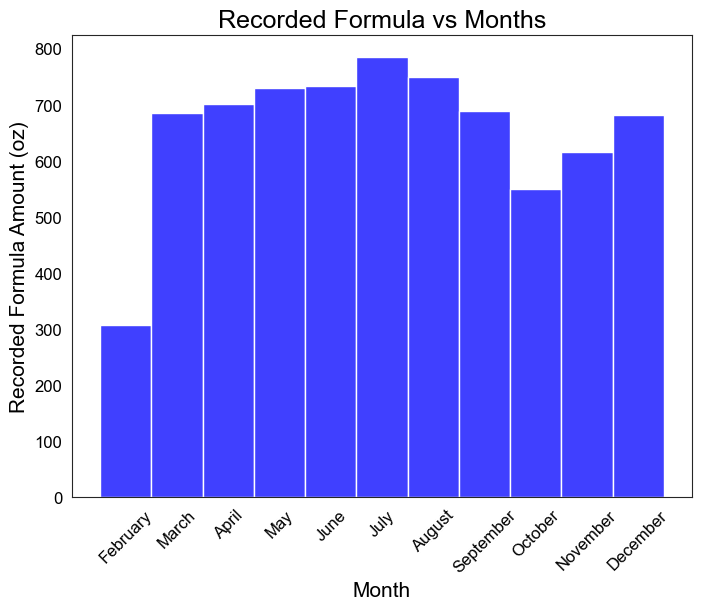

In [115]:
# plot histogram of sleep data
plt.figure(figsize=(8,6))
sns.set_style(style='white')

months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


feed['month'] = pd.Categorical(feed['month'], categories=months, ordered=True )

feed = feed.sort_values('month')

sns.histplot(data=feed, x='month', weights='status', bins=20, discrete=True, kde=False, color="blue")

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Recorded Formula Amount (oz)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Recorded Formula vs Months', color='black', fontsize=18)
           
plt.show()

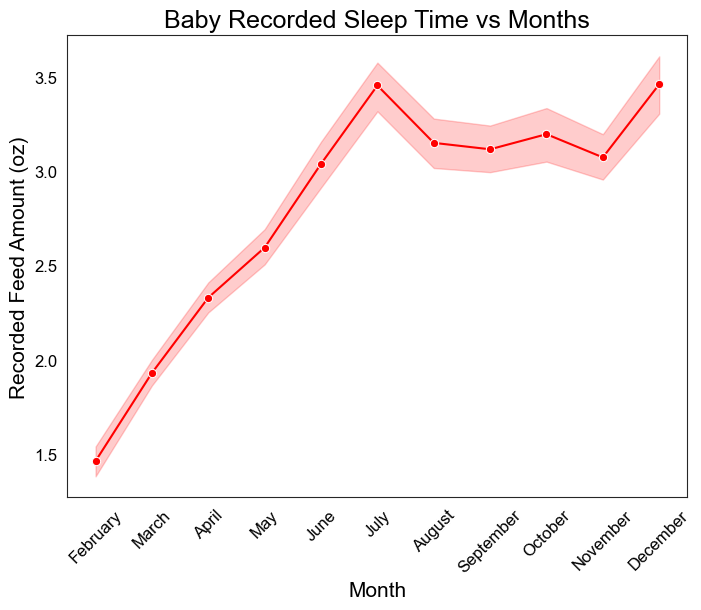

In [56]:
# plot sleep data using the minute calculation
months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


feed['month'] = pd.Categorical(feed['month'], categories=months, ordered=True )

feed = feed.sort_values('month')

plt.figure(figsize=(8,6))
sns.set_style(style= 'white')

sns.lineplot(data=feed, x='month', y='status', color='red', marker = 'o')

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Recorded Feed Amount (oz)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Baby Recorded Sleep Time vs Months', color='black', fontsize=18)
           
plt.show()

In [57]:
# calculate feed sum
feed_sum = feed.groupby('month')['status'].sum().reset_index()
feed_sum.head()

# calculate mean feed amount
feed_avg = feed.groupby('month')['status'].mean().reset_index()
feed_avg.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\1909272039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feed_sum = feed.groupby('month')['status'].sum().reset_index()
C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\1909272039.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feed_avg = feed.groupby('month')['status'].mean().reset_index()


,month,status
0,February,1.463333
1,March,1.930423
2,April,2.329668
3,May,2.595125
4,June,3.038880


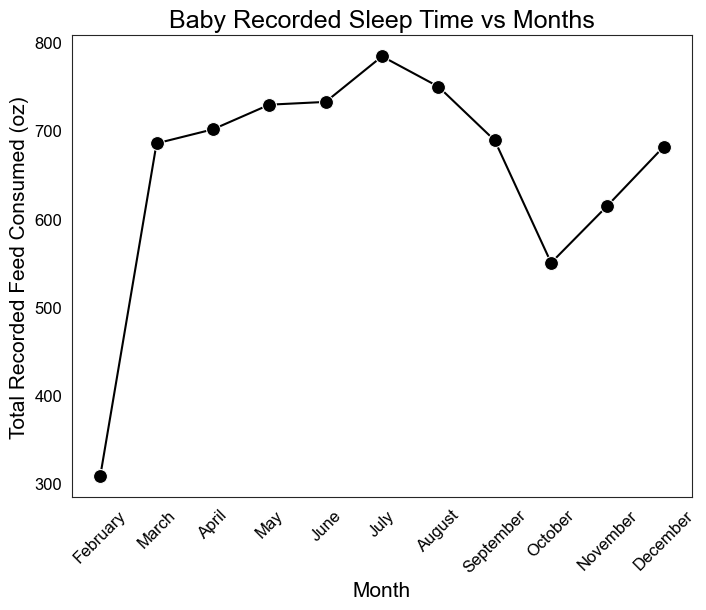

In [58]:
# plot sleep data using the minute calculation
months = [ 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']


feed_sum['month'] = pd.Categorical(feed_sum['month'], categories=months, ordered=True )

feed_sum =feed_sum.sort_values('month')

plt.figure(figsize=(8,6))
sns.set_style(style= 'white')

sns.lineplot(data=feed_sum, x='month', y='status', color='black', marker = 'o', markersize=10)

plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Total Recorded Feed Consumed (oz)', fontsize=15, color='black')

plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

plt.title('Baby Recorded Sleep Time vs Months', color='black', fontsize=18)
           
plt.show()

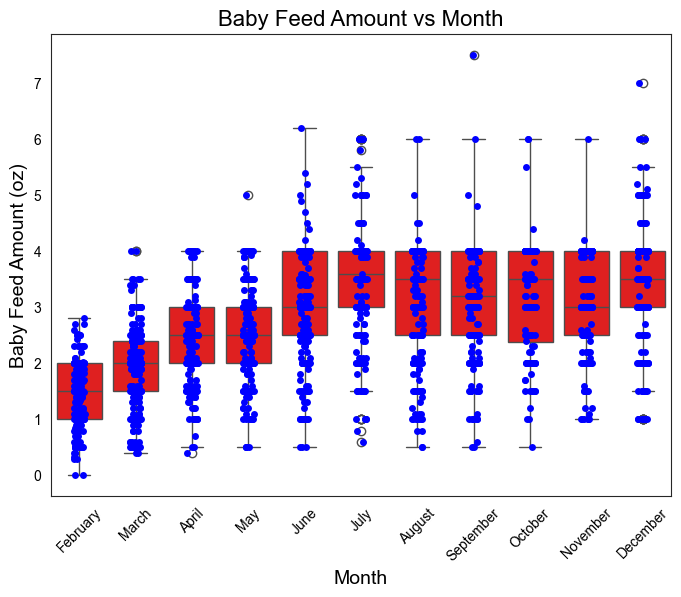

In [113]:
# box plot with data overlaid 
plt.figure(figsize=(8,6))

sns.boxplot(data=feed, x='month', y='status', color='red')
sns.stripplot(data=feed, x='month', y='status', color='blue', jitter=True, size=5)

plt.xlabel('Month',fontsize =14, color='black')
plt.ylabel('Baby Feed Amount (oz)', fontsize=14, color='black')

plt.xticks(fontsize=10, color='black', rotation=45)
plt.yticks(fontsize=10, color='black')

plt.title('Baby Feed Amount vs Month', fontsize=16, color='black')

plt.show()

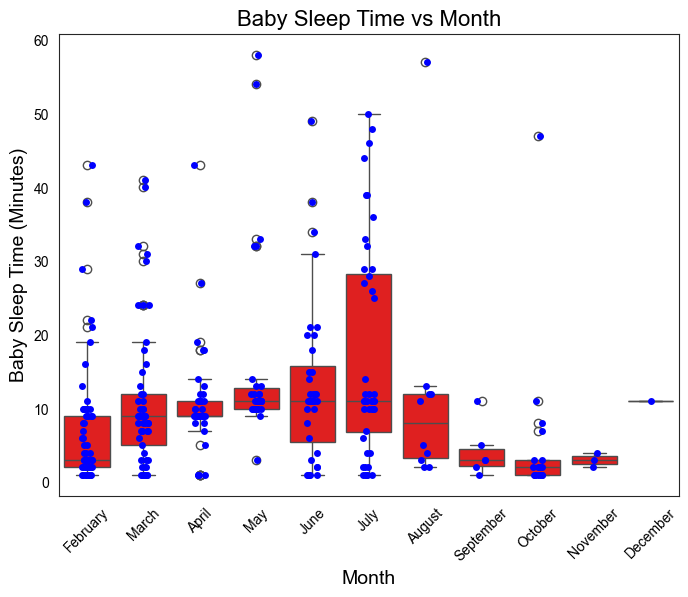

In [117]:
# box plot with data overlaid 
plt.figure(figsize=(8,6))

sns.boxplot(data=sleep, x='month', y='status', color='red')
sns.stripplot(data=sleep, x='month', y='status', color='blue', jitter=True, size=5)

plt.xlabel('Month',fontsize =14, color='black')
plt.ylabel('Baby Sleep Time (Minutes)', fontsize=14, color='black')

plt.xticks(fontsize=10, color='black', rotation=45)
plt.yticks(fontsize=10, color='black')

plt.title('Baby Sleep Time vs Month', fontsize=16, color='black')

plt.show()

#### Combine Feed data with Sleep data


In [59]:
# combine the data from feed and sleep
feed_sum_1 = feed_sum.drop(columns='month')
combined_feed_sleep = pd.concat([feed_sum_1,sleep_sum ], axis=1)
combined_feed_sleep.head()

feed_sleep_rename = combined_feed_sleep.rename(columns=
                                               {
                                                "month": 'month',
                                                'status': 'feed_amount',
                                                'sleep_minutes': "sleep_amount"
})

feed_sleep_rename.head()
#feed_sleep_rename.info()
#print(feed_sleep_rename.shape)

,feed_amount,month,sleep_amount
0,307.30,February,15890
1,685.30,March,18963
2,701.23,April,20590
3,729.23,May,16289
4,732.37,June,16991


C:\Users\Owner\AppData\Local\Temp\ipykernel_51788\3128434936.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(feed_sleep_rename['month'], rotation = 45)


<Figure size 800x600 with 0 Axes>

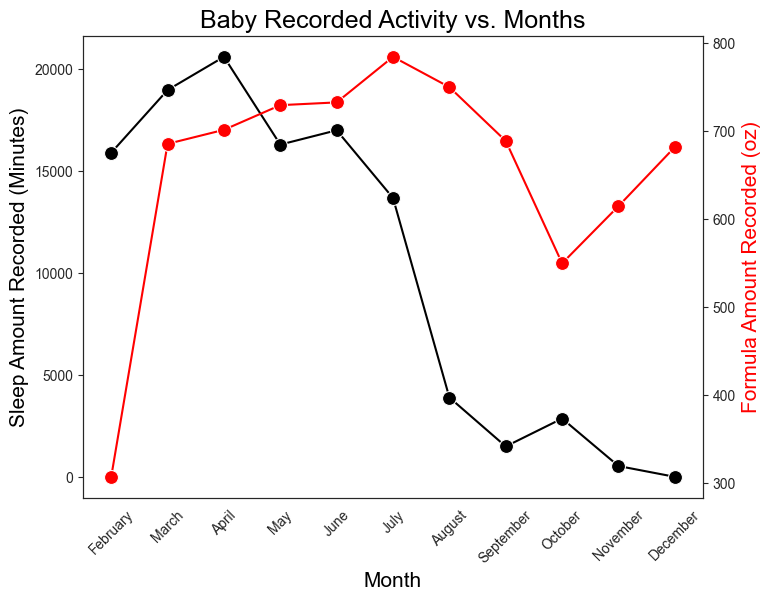

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feed_sleep_rename['month'] = feed_sleep_rename['month'].astype(str)

plt.figure(figsize=(8,6))
sns.set_style('white')

# Create the main y-axis for sleep data
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()  # Create a secondary y-axis


# Plot sleep data (Black Line)
sns.lineplot(data=feed_sleep_rename, x='month', y='sleep_amount', color='black', marker='o', 
             markersize=10, ax=ax1)

# Plot feed data on secondary y-axis (Red Line)
sns.lineplot(data=feed_sleep_rename, x='month', y='feed_amount', color='red', marker='o', 
             markersize=10, ax=ax2)

# Labels and Titles
ax1.set_xlabel('Month', fontsize=15, color='black')
ax1.set_ylabel('Sleep Amount Recorded (Minutes)', fontsize=15, color='black')
ax1.set_xticklabels(feed_sleep_rename['month'], rotation = 45)
ax2.set_ylabel('Formula Amount Recorded (oz)', fontsize=15, color='red')

plt.title('Baby Recorded Activity vs. Months', color='black', fontsize=18)

# Rotate x-axis labels
#plt.xticks(rotation=45)
#plt.xticks(rotation=45)

#plt.legend()
plt.show()


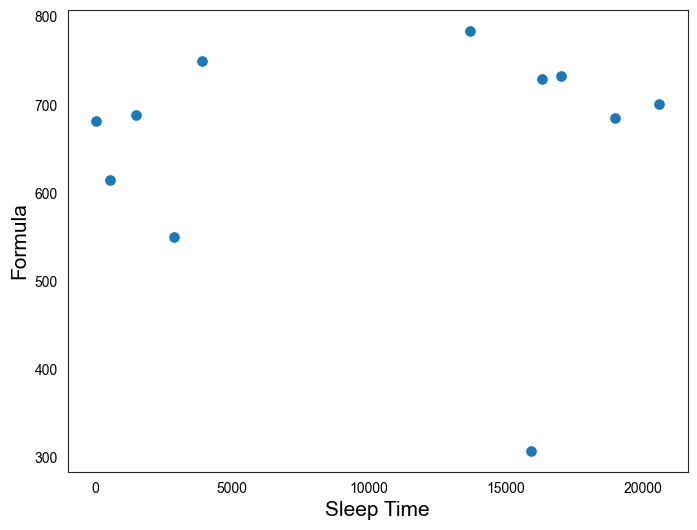

In [61]:
# Plot the results of the findings
plt.figure(figsize=(8,6))
sns.set_style(style = 'white')

sns.scatterplot(data=feed_sleep_rename, x = 'sleep_amount', 
                y='feed_amount', s=70)
plt.xlabel("Sleep Time", color='black', fontsize= 15)
plt.ylabel('Formula', color='black', fontsize=15)

plt.xticks(color='black')
plt.yticks(color='black')

plt.show()

#### Diaper Changes

In [68]:
diaper.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,01:00:00,AM,change,Wet,NaN,February,12,2022
3,Diaper,01:00:00,PM,change,Wet,NaN,March,20,2022
6,Diaper,01:00:00,PM,change,Wet,NaN,April,19,2022
7,Diaper,01:00:00,PM,change,Wet,NaN,July,15,2022
10,Diaper,01:00:00,PM,change,Wet,NaN,November,30,2022


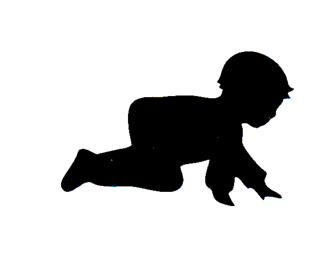

In [70]:
import cv2
from PIL import Image

img = cv2.imread('baby_img.jpg')


cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, mask_cleaned = cv2.threshold(cv_img, 50, 255, cv2.THRESH_BINARY)

masked = np.array(Image.open('baby_img.jpg').convert('L'))
cv2.imwrite("cleaned_baby_shape.png", mask_cleaned)


# Display using Matplotlib
plt.figure(figsize=(4, 6))
plt.imshow(mask_cleaned)
plt.axis("off")  # Hide axes
plt.show()

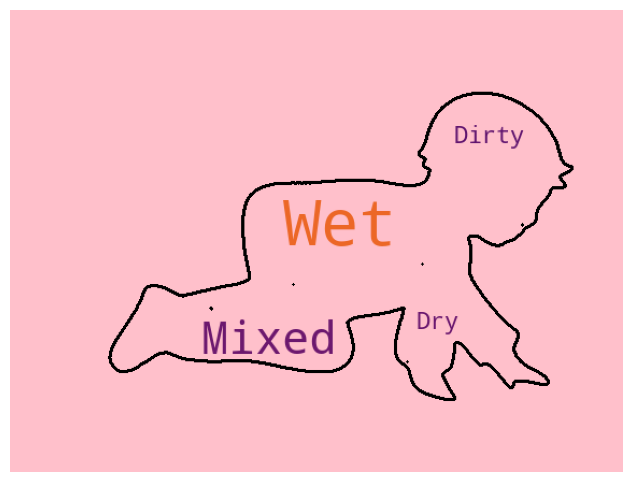

In [76]:


from wordcloud import WordCloud, STOPWORDS
from PIL import  Image
import cv2
text_diaper = " ".join(diaper['status'].astype(str))

#text = " ".join(not_feed['parent_activity'].astype(str))
#mask = np.array(Image.open('baby_img.jpg'))
#mask = np.array(Image.open('baby_img.jpg').convert('L'))
#mask = Image.open('baby_img.jpg')

# Create a word cloud with custom shape
wordcloud = WordCloud(
    background_color="pink", 
    margin=10,
    mask=mask_cleaned, 
    contour_width=2, 
    contour_color="black",
    colormap="inferno",  # Adjust colors
    width=800,
    height=800
).generate(text_diaper)

# Display the word cloud
plt.figure(figsize=(8,6))
#plt.imshow(wordcloud, interpolation="bilinear")
plt.imshow(wordcloud)
plt.axis("off")  # Hide axes
plt.show()





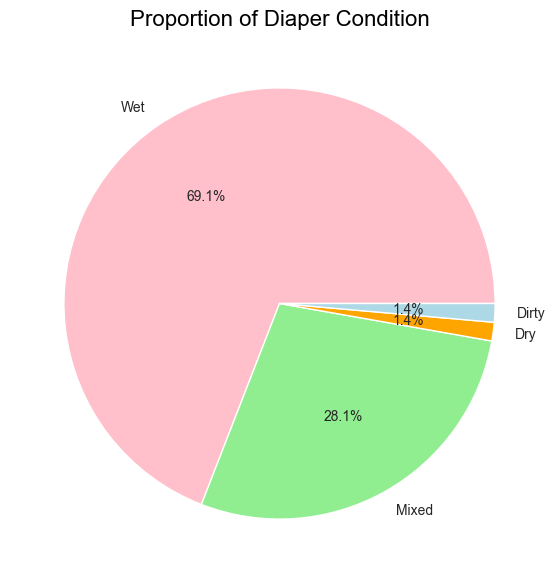

In [83]:
diaper['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                               colors=['pink', 'lightgreen','orange', 'lightblue'], figsize=(7,7))


plt.ylabel('')  # Removes default y-label
plt.title('Proportion of Diaper Condition', fontsize=16, color='black')

plt.show()

#### Cost of diapers spent on first year

In [99]:
diaper.head()
diaper.shape
diaper_changes = diaper.shape[0]
print(diaper_changes)

# unit cost of diapers - pampers swaddlers
unit_cost = 0.28
annual_diaper_cost = diaper_changes * 0.28

print(f"Cost of First Year of Diapers is: ${annual_diaper_cost:.2f}")

2013
Cost of First Year of Diapers is: $563.64


#### Specific diaper sizes
* #### Size 1 (8-14 lbs) - Newborn (0 - 3 Months)
* #### Size 2 (12-18 lbs) - Newborn (0 -3 Months)
* #### Size 3 (16-28 lbs) Infant (3 -12 Months)


In [98]:
# Cost of Diapers
huggies_size1 = 0.28
huggies_size2 = 0.30
huggies_size3 = 0.33

# group months and do calculation
quater_1 = diaper[diaper['month'].isin(['February', "March", 'April'])]

# rest of months 
rest_months = diaper[~diaper['month'].isin(['February', "March", 'April'])]

print(quater_1.shape)
print(rest_months.shape)

(690, 9)
(1323, 9)


In [103]:
# Specific diaper sizes
quater_count = quater_1.shape[0]
rest_count = rest_months.shape[0]

# new Total diaper cost 
total_diaper_cost = quater_count*huggies_size2 + rest_count*huggies_size3
#print(total_diaper_cost)

print(f"Cost of First Year of Diapers is: ${total_diaper_cost:.2f}")

Cost of First Year of Diapers is: $643.59


In [105]:
feed.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
1,Feeding,01:00:00,AM,Formula,1.69,oz.,February,12,2022
5522,Feeding,12:34:00,PM,Formula,1.00,oz.,February,28,2022
5492,Feeding,12:30:00,AM,Formula,0.50,oz.,February,10,2022
5470,Feeding,12:26:00,PM,Formula,0.60,oz.,February,11,2022
5425,Feeding,12:21:00,AM,Formula,1.50,oz.,February,19,2022


In [112]:
# Cost of baby formula - Enformil pro
formula_unit_cost = 0.83
enformil_bottle_oz = 2

# enformil pro amount used
#print(feed.shape)

# Assumming Enformil liquid bottles were used 2 oz bottles were used 
sum_formula = feed['status'].sum()
#print(sum_formula)

# print total amount of forula consumed by newborn
print(f"Total Formula Consumed by first year: {sum_formula:.3f} oz")

# compute ounces relative to enfomil pro bottles
relative_formul_cost = sum_formula/enformil_bottle_oz * 0.83

# print total cost of formula for first year
print(f"Total Formula Consumed by first year: ${relative_formul_cost:.3f}")

Total Formula Consumed by first year: 7223.830 oz
Total Formula Consumed by first year: $2997.889


#### Parent wake-up time at Night 